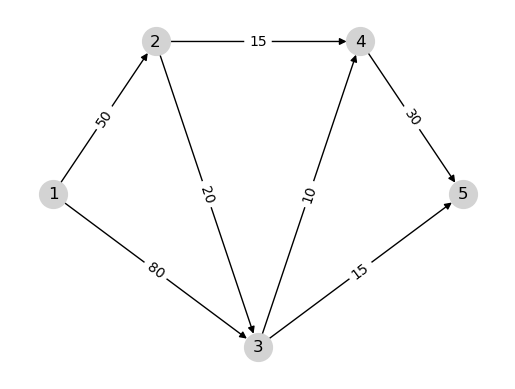

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

weighted_elist=[(1,2,50),(1,3,80),(2,3,20),(2,4,15),(3,4,10),(3,5,15),(4,5,30)]
P={1:(0,1),2:(1,2),3:(2,0),4:(3,2),5:(4,1)}
G=nx.DiGraph()
G.add_weighted_edges_from(weighted_elist)
elbs={(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
nx.draw_networkx(G,pos=P,node_color='lightgray',node_size=400)
nx.draw_networkx_edge_labels(G,pos=P,edge_labels=elbs)
plt.axis('off')
plt.show()

In [4]:
nx.dijkstra_path(G,1,5)

[1, 2, 3, 5]

In [7]:
weighted_elist=[(0,1,56),(0,2,35),(0,3,2),(0,4,51),(0,5,60),(1,2,21),(1,3,57),(1,4,78),(1,5,70),(2,3,36),(2,4,68),(2,5,68),(3,4,51),(3,5,61),(4,5,13)]

In [8]:
P={0:(0,2),1:(3**0.5,1),2:(3**0.5,-1),3:(0,-2),4:(-3**0.5,-1),5:(-3**0.5,1)}

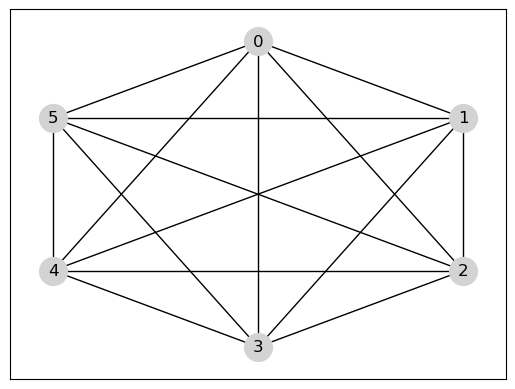

In [9]:
G=nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs={(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
nx.draw_networkx(G,pos=P,node_color='lightgray',node_size=400)

In [10]:
pip install fast_tsp

     ---------------------------------------- 70.2/70.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
d=[[0]*6 for _ in range(6)]

In [12]:
d

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [22]:
for (i,j,w) in weighted_elist:
    d[i][j]=w
    d[j][i]=w

d
print(d[0][1])

56


In [15]:
import fast_tsp  as tsp
tour= tsp.find_tour(d)
tour

[0, 2, 1, 5, 4, 3]

0
0 2 35
1
2 1 21
2
1 5 70
3
5 4 13
4
4 3 51
3 0 2


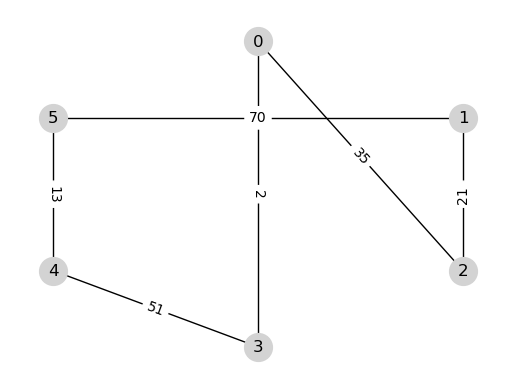

In [24]:
tsp_elist=[]
for i in range(6):
    if i!=5:
        print(i)
        j=tour[i]
        k=tour[i+1]
        print(j,k,d[j][k])
        tsp_elist.append((j,k,d[j][k]))
    elif i==5:
        j=tour[5]
        k=tour[0]
        print(j,k,d[j][k])
        tsp_elist.append((j,k,d[j][k]))
P={0:(0,2),1:(3**0.5,1),2:(3**0.5,-1),3:(0,-2),4:(-3**0.5,-1),5:(-3**0.5,1)}
TSP=nx.Graph()
TSP.add_weighted_edges_from(tsp_elist)

elbs={(u,v):TSP[u][v]['weight'] for (u,v) in TSP.edges()}
nx.draw_networkx(TSP,pos=P,node_color='lightgray',node_size=400)
nx.draw_networkx_edge_labels(TSP,pos=P,edge_labels=elbs)
plt.axis('off')
plt.show()

In [25]:
from PIL import Image

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

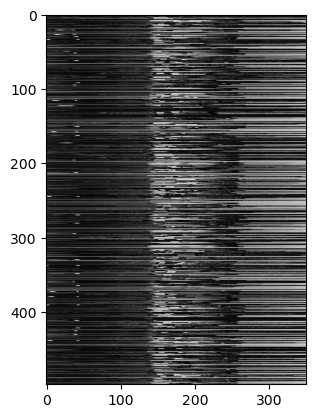

In [29]:
p1=r'C:\Users\84280\Desktop\lianxi\tsp\picture1.npy'
ar=np.load(p1)
plt.imshow(ar,cmap='gray')

In [30]:
ar

array([[ 53,  39,  38, ..., 176, 177, 180],
       [ 35,  21,  18, ...,  39,  49,  65],
       [ 36,  22,  18, ...,  23,  21,  28],
       ...,
       [ 45,  33,  32, ..., 173, 175, 181],
       [ 71,  62,  62, ..., 176, 181, 189],
       [ 36,  24,  24, ..., 160, 163, 166]])

In [38]:
print(ar[0])

[ 53  39  38  38  38  40  38  41  40  38  38  39  39  37  36  35  37  39
  39  37  35  37  38  38  37  37  37  35  35  38  41  43  41  40  39  39
  41  42  41  39  41  41  41  41  41  41  42  42  44  43  42  42  43  43
  43  43  45  45  45  45  44  44  45  45  46  47  50  51  51  50  49  49
  48  49  49  48  49  51  51  51  51  52  54  54  52  50  49  48  55  54
  52  50  51  54  56  58  53  54  55  55  54  53  54  55  57  57  56  57
  56  55  56  58  59  61  62  62  59  58  59  61  65  63  60  58  58  59
  61  62  60  59  59  61  66  69  53  28  11   3  12  26  38  42  34  31
  40  75 122 157 171 167 166 173 175 177 177 175 174 174 175 175 183 184
 183 182 183 185 186 185 187 188 190 191 191 191 190 190 188 188 189 189
 190 190 190 190 189 188 185 183 181 182 184 186 186 183 180 176 173 172
 174 177 174 168 167 173 170 159 152 153 155 155 153 151 151 152 153 153
 148 149 146 141 136 132 125 118 113 113 111 108 109 112 109 103  83  56
  54  61  48  43  50  47  36  26  19  16  12  10   

In [40]:
weight_list=[]
for i in range(498):
    for j in range(i+1,498):
        d=np.sum(np.power((ar[i]-ar[j]),2))
        weight_list.append((i,j,d))
    

In [44]:
len(weight_list)

picd=[[0]*498 for _ in range(498)]

In [46]:
for (i,j,w) in weight_list:
    picd[i][j]=w
    picd[j][i]=w


In [48]:
ptour= tsp.find_tour(picd)
len(ptour)


498

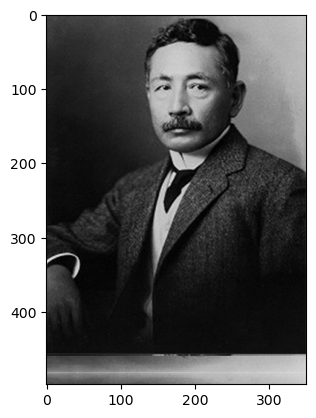

In [78]:
res=[ar[ptour[i]] for i in range(497,-1,-1)]
plt.imshow(res,cmap='gray')

In [56]:
p2=r'C:\Users\84280\Desktop\lianxi\tsp\picture2.npy'
p3=r'C:\Users\84280\Desktop\lianxi\tsp\picture3.npy'
ar2=np.load(p2)
ar3=np.load(p3)
ar2.shape,ar3.shape

((253, 199), (245, 206))

In [57]:
weight_list2=[]
for i in range(253):
    for j in range(i+1,253):
        d=np.sum(np.power((ar[i]-ar[j]),2))
        weight_list2.append((i,j,d))

p2icd=[[0]*253 for _ in range(253)]

for (i,j,w) in weight_list2:
    p2icd[i][j]=w
    p2icd[j][i]=w


31878

In [162]:
def imshow(ar,a):
    
    ### please 
    m=ar.shape[0]
    weight_list=[]
    for i in range(m):
        for j in range(i+1,m):
            d=np.sum(np.power((ar[i]-ar[j]),2))
            weight_list.append((i,j,d))
    picd=[[0]*m for _ in range(m)]
    for (i,j,w) in weight_list:
        picd[i][j]=w
        picd[j][i]=w
    ptour= tsp.find_tour(picd)

    if a==-1:
        res=[ar[ptour[i]] for i in range(m-1,-1,-1)]
        plt.imshow(res,cmap='gray')
    elif a==1:
        print('upsidedown')
        res=[ar[ptour[i]] for i in range(m)]
        plt.imshow(res,cmap='gray')
    


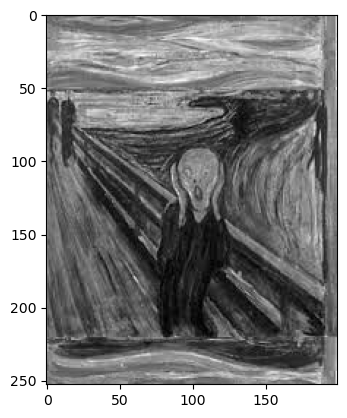

In [163]:
imshow(ar2,-1)

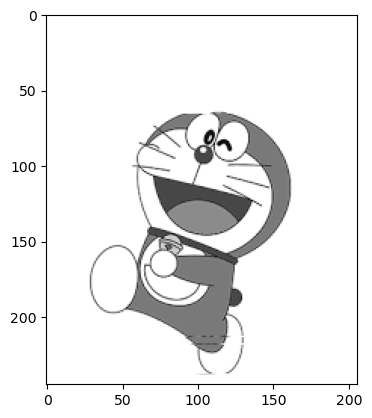

In [168]:
imshow(ar3,-1)

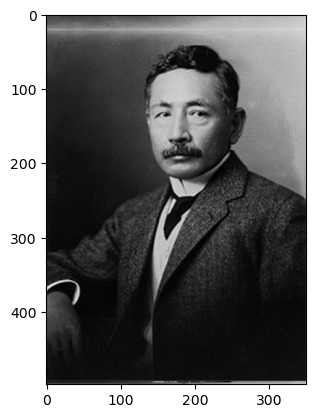

In [169]:
imshow(ar,-1)